/home/arashsafari/Projects/Voice Proessing/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


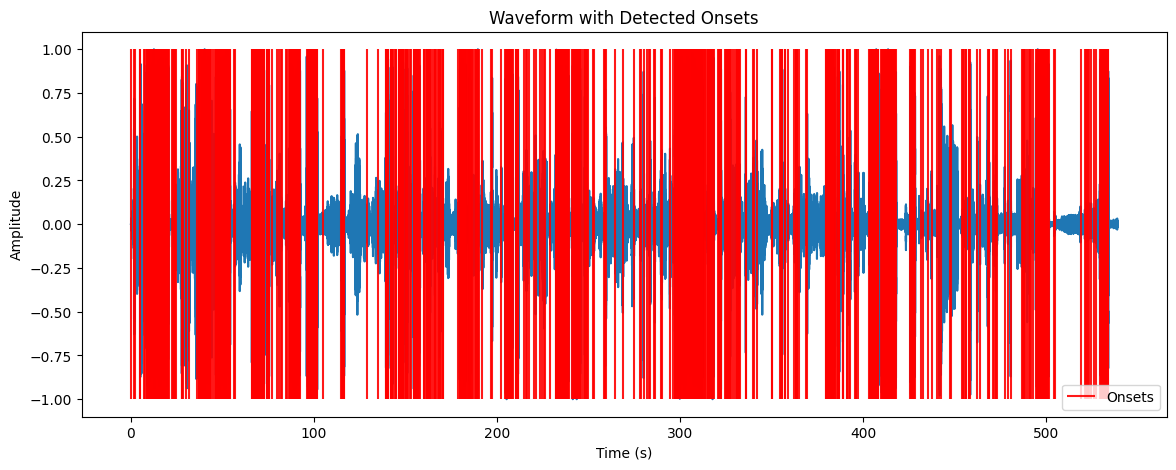

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file = './voice/4-5783063126354170334_hJXjGp5D.wav'
audio, sr = librosa.load(audio_file, sr=None)

# Perform onset detection
onsets = librosa.onset.onset_detect(y=audio, sr=sr)
onset_frames = librosa.frames_to_samples(onsets)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
plt.vlines(onset_frames / sr, -1, 1, color='r', alpha=0.9, label='Onsets')
plt.title("Waveform with Detected Onsets")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

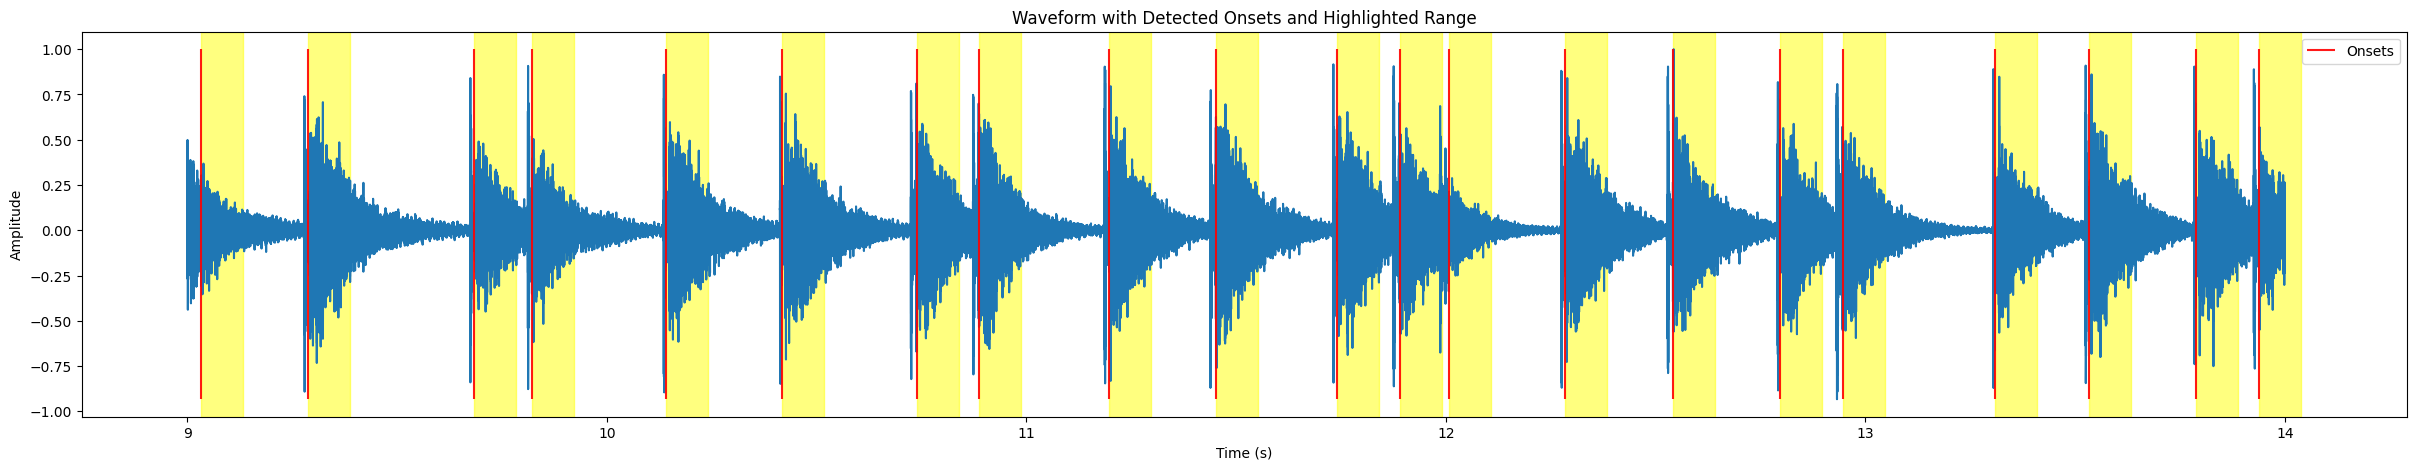

In [45]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file = './voice/4-5783063126354170334_hJXjGp5D.wav'
audio, sr = librosa.load(audio_file, sr=None)

# Define the start and end time for the 5-second segment
start_time = 9  # Adjust the start time as needed
end_time = start_time + 5

# Extract the specific segment
start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
segment = audio[start_sample:end_sample]

# Perform onset detection on the segment
onsets = librosa.onset.onset_detect(y=segment, sr=sr)
onset_frames = librosa.frames_to_samples(onsets) + start_sample

# Plotting the waveform of the segment with onsets
plt.figure(figsize=(30, 5))
plt.plot(np.linspace(start_time, end_time, num=len(segment)), segment)
plt.vlines(onset_frames / sr, np.min(segment), np.max(segment), color='r', alpha=0.9, label='Onsets')

# Highlight the range from 10 ms before the onset to 100 ms after the onset
highlight_duration = 0.1  # 100 ms in seconds
for onset_frame in onset_frames:
    onset_time = onset_frame / sr
    plt.axvspan(onset_time, onset_time + highlight_duration, alpha=0.5, color='yellow', label=None)

plt.title("Waveform with Detected Onsets and Highlighted Range")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [47]:
import librosa
import soundfile as sf
import os

# Load the audio file
audio_file = './voice/4-5783063126354170334_hJXjGp5D.wav'
audio, sr = librosa.load(audio_file, sr=None)

# Perform onset detection
onsets = librosa.onset.onset_detect(y=audio, sr=sr, units='samples')
onset_duration_samples = int(0.1 * sr)

# Path to save the onset audio files
save_path = './4-5783063126354170334_hJXjGp5D'
os.makedirs(save_path, exist_ok=True)

# Extract and save each onset as an audio file
for i, onset in enumerate(onsets):
    # Define the start and end of the onset audio slice
    start_sample = onset
    end_sample = min(start_sample + onset_duration_samples, len(audio))
    
    # Extract the onset audio slice
    onset_audio = audio[start_sample:end_sample]
    
    # Save the onset audio slice to a file
    onset_filename = f"{save_path}/4-5783063126354170334_hJXjGp5D_onset_{i}.wav"
    sf.write(onset_filename, onset_audio, sr)


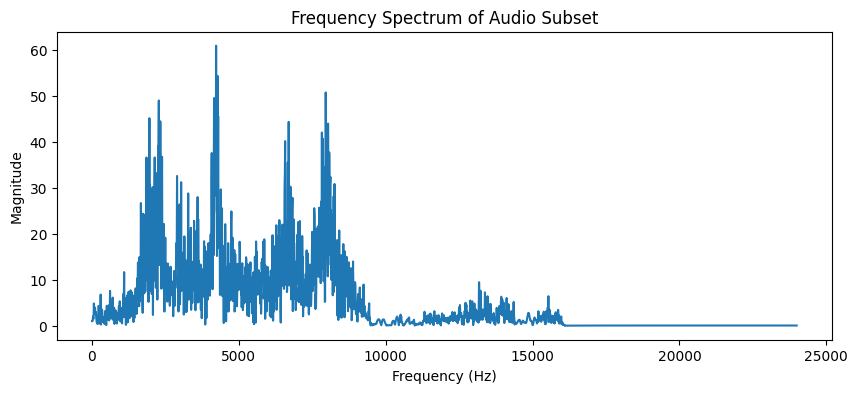

In [52]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
file_path = f'{save_path}/4-5783063126354170334_hJXjGp5D_onset_37.wav'
audio, sr = librosa.load(file_path, sr=None)

# Perform FFT
fft_result = np.fft.fft(audio)
fft_freq = np.fft.fftfreq(len(fft_result), 1/sr)

# Consider only the positive frequencies
positive_freqs = fft_freq > 0
fft_result = fft_result[positive_freqs]
fft_freq = fft_freq[posidtive_freqs]

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(fft_freq, np.abs(fft_result))  # Plot magnitude of FFT
plt.title("Frequency Spectrum of Audio Subset")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
